In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis 



In [2]:
piz = pd.read_csv(r"C:\Users\HP\Downloads\Pizza+Place+Sales\pizza_sales\order_details.csv")
piz_order = pd.read_csv(r"C:\Users\HP\Downloads\Pizza+Place+Sales\pizza_sales\orders.csv", encoding_errors="ignore")
piz_types = pd.read_csv(r"C:\Users\HP\Downloads\Pizza+Place+Sales\pizza_sales\pizza_types.csv", encoding_errors="ignore")
piz_price = pd.read_csv(r"C:\Users\HP\Downloads\Pizza+Place+Sales\pizza_sales\pizzas.csv", encoding_errors="ignore")


## Merging the tables accordingly

Step 1: Merging orders with order_details

In [3]:
merged = pd.merge(piz, piz_order, on="order_id")
merged


,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40
...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54


#2: Merge with pizzas (to get price, size, pizza_type_id) 

In [4]:
merged_2 = pd.merge(merged, piz_price, on="pizza_id")
merged_2

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00
...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25


3: Merge with pizza_types (to get category, name, ingredients) 
 

In [5]:
final_df = pd.merge(merged_2, piz_types, on="pizza_type_id")
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


## To describe the price distribution

In [6]:
final_df['price'].describe() #this gives the descriptive statistics 

count    48620.000000
mean        16.494132
std          3.621789
min          9.750000
25%         12.750000
50%         16.500000
75%         20.250000
max         35.950000
Name: price, dtype: float64

In [7]:
final_df['date'] #check the date coolumns

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
48615    2015-12-31
48616    2015-12-31
48617    2015-12-31
48618    2015-12-31
48619    2015-12-31
Name: date, Length: 48620, dtype: object

## Creating the Revenue column on the table

In [8]:
final_df['Revenue'] = final_df['quantity'] * final_df['price']
final_df['Revenue']


0        13.25
1        16.00
2        18.50
3        20.75
4        16.00
         ...  
48615    16.75
48616    17.95
48617    12.00
48618    20.25
48619    12.75
Name: Revenue, Length: 48620, dtype: float64

## Total Revenue 

In [9]:
total_revenue = final_df['Revenue'].sum() #gettingthe total revenue of all the pizza sales
total_revenue

817860.05

## Total Quantity Sold

In [10]:
total_quantity = final_df['quantity'].sum() #Summing up all quantities ordered
total_quantity

49574

## All Orders: Total Pizza Orders

In [11]:
total_pizza_orders = final_df["order_id"].nunique() 
total_pizza_orders 

21350

## Pizza Types Sold

In [12]:
pizza_types_sold_count = final_df["pizza_type_id"].nunique() #only unique pizza types while ignoring the repeated pizzatypes
pizza_types_sold_count


32

## The average price of the pizza acrossboard 

In [13]:
Average_price = final_df["price"].mean()
Average_price

16.494132044426163

## Getting the peak hours for sales of pizzas

In [14]:
final_df['time'] = pd.to_datetime(final_df['time'], format='%H:%M:%S') #Converting the date column to datitme format 
final_df['time'] 

0       1900-01-01 11:38:36
1       1900-01-01 11:57:40
2       1900-01-01 11:57:40
3       1900-01-01 11:57:40
4       1900-01-01 11:57:40
                ...        
48615   1900-01-01 21:23:10
48616   1900-01-01 21:23:10
48617   1900-01-01 21:23:10
48618   1900-01-01 22:09:54
48619   1900-01-01 23:02:05
Name: time, Length: 48620, dtype: datetime64[ns]

In [15]:
#Now to extract the hours of sales 
final_df['hour'] = final_df['time'].dt.hour
final_df['hour'] 

0        11
1        11
2        11
3        11
4        11
         ..
48615    21
48616    21
48617    21
48618    22
48619    23
Name: hour, Length: 48620, dtype: int32

In [16]:
#Group by hours and sum Revenue accordingly in those hours
per_hour_sales = final_df.groupby('hour')['Revenue'].sum()
per_hour_sales


hour
9         83.00
10       303.65
11     44935.80
12    111877.90
13    106065.70
14     59201.40
15     52992.30
16     70055.40
17     86237.45
18     89296.85
19     72628.90
20     58215.40
21     42029.80
22     22815.15
23      1121.35
Name: Revenue, dtype: float64

# Peak hour sales

In [17]:
#Hour with the highest sales
peak_hour = per_hour_sales.idxmax()
peak_hour

12

## Total sales made for each day of the week 

In [18]:
#convert date column to datetime 
final_df['date'] = pd.to_datetime(final_df['date'], errors = 'coerce') 
final_df['date']

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
48615   2015-12-31
48616   2015-12-31
48617   2015-12-31
48618   2015-12-31
48619   2015-12-31
Name: date, Length: 48620, dtype: datetime64[ns]

In [19]:
#index the days of week (Monday=0, Tuesday=1,Wednesday=2, Thursday=3, Friday=4, Saturday=5, Sunday=6)
final_df['day_of_week'] = final_df['date'].dt.day_name()
final_df['day_of_week']

0        Thursday
1        Thursday
2        Thursday
3        Thursday
4        Thursday
           ...   
48615    Thursday
48616    Thursday
48617    Thursday
48618    Thursday
48619    Thursday
Name: day_of_week, Length: 48620, dtype: object

In [20]:
#Group sales revenue by day of the week
daily_sales = final_df.groupby('day_of_week')['Revenue'].sum().sort_values(ascending=False) 
daily_sales 


day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: Revenue, dtype: float64

In [21]:
#The day with the highest sales
highest_day_sales = daily_sales.idxmax()
highest_day_sales

'Friday'

## Top 5 best selling pizza types

In [22]:
top5_quatity = final_df.groupby('pizza_type_id')['quantity'].sum().sort_values(ascending=False).head(5) 
top5_quatity 

pizza_type_id
classic_dlx    2453
bbq_ckn        2432
hawaiian       2422
pepperoni      2418
thai_ckn       2371
Name: quantity, dtype: int64

In [23]:
#Top 5 revenue
top5_revenue = final_df.groupby('pizza_type_id')['Revenue'].sum().sort_values(ascending=False).head(5)
top5_revenue


pizza_type_id
thai_ckn       43434.25
bbq_ckn        42768.00
cali_ckn       41409.50
classic_dlx    38180.50
spicy_ital     34831.25
Name: Revenue, dtype: float64

## Sales Made in Each Month

### we'll need to extract the month

In [24]:
final_df['month'] = final_df['date'].dt.month_name()
monthly_sales = final_df.groupby('month')['Revenue'].sum().sort_values()
monthly_sales

month
October      64027.60
September    64180.05
December     64701.15
February     65159.60
June         68230.20
August       68278.25
April        68736.80
January      69793.30
November     70395.35
March        70397.10
May          71402.75
July         72557.90
Name: Revenue, dtype: float64

## Pizza Types that are not doing well


In [25]:
least_selling_pizzas = final_df.groupby('pizza_type_id')['quantity'].sum().sort_values().head(5)
least_selling_pizzas


pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
Name: quantity, dtype: int64

## Catgory sales
Just trying to check performance by category

In [27]:
category_sales = final_df.groupby('category')['Revenue'].sum().sort_values(ascending=False)
category_sales


category
Classic    220053.10
Supreme    208197.00
Chicken    195919.50
Veggie     193690.45
Name: Revenue, dtype: float64

### What of size preferences? what size is more preferred

In [28]:
size_sales = final_df.groupby('size')['quantity'].sum().sort_values(ascending=False)
size_sales


size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

### What day of the week and at what hour was there a peak sales 

In [29]:
sales_heatmap = final_df.groupby(['day_of_week','hour'])['Revenue'].sum().unstack()
sales_heatmap


hour,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,
Friday,NaN,NaN,6449.30,18227.05,17144.55,8583.45,7182.05,9642.15,12622.40,15440.05,12287.05,11659.15,10131.80,6274.20,430.70
Monday,NaN,50.25,7767.00,18596.10,13292.20,7614.80,6868.80,8907.75,11893.70,11044.70,8853.85,5866.25,4638.15,1869.05,66.95
Saturday,NaN,52.75,3335.55,10299.80,13001.15,8646.40,8671.55,10588.10,12107.60,14591.25,13956.25,12031.60,9811.15,5579.30,509.95
Sunday,NaN,37.50,3818.75,9988.80,11452.95,8466.70,8075.85,10092.25,11776.30,11964.25,9435.75,6639.10,5001.35,2384.20,69.75
Thursday,NaN,86.50,7731.65,19042.20,18807.10,9423.10,7594.30,10795.05,14064.55,13335.85,9639.60,7530.50,3537.50,1896.60,44.00
Tuesday,83.0,NaN,7147.05,18364.85,16889.00,8084.65,6922.50,10449.70,10980.50,10403.80,9960.95,7943.85,4470.45,2433.50,NaN
Wednesday,NaN,76.65,8686.50,17359.10,15478.75,8382.30,7677.25,9580.40,12792.40,12516.95,8495.45,6544.95,4439.40,2378.30,NaN


Observations 
A handful of pizzas drive most of the revenue (Pareto principle: ~20% of pizzas bring ~80% of sales).

Sales peak in evenings (dinner hours) and weekends.

Certain months (holidays, summer) show spikes.

Some pizzas barely sell — potential ones to rebrand.


### Plotting graph and charts to display trends

### Top 5s

C:\Users\HP\AppData\Local\Temp\ipykernel_13860\3036379670.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_quantity.index, y=top5_quantity.values, palette='viridis')


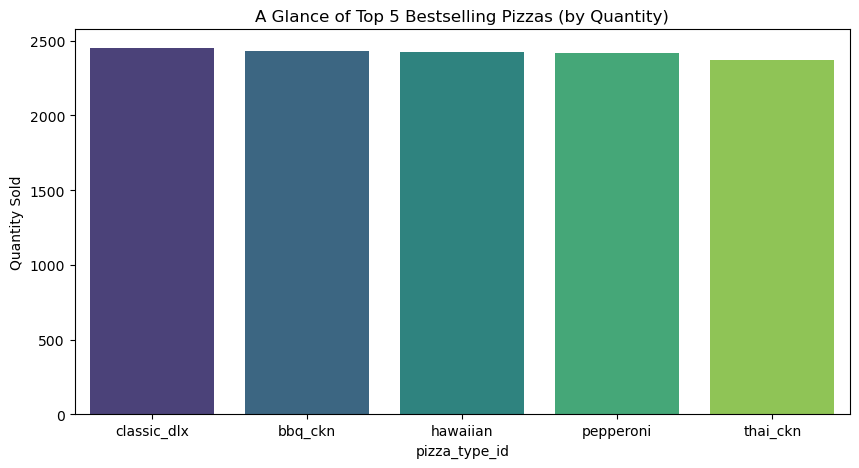

In [30]:
top5_quantity = final_df.groupby('pizza_type_id')['quantity'].sum().sort_values(ascending=False).head(5) 
top5_revenue = final_df.groupby('pizza_type_id')['Revenue'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5)) 
sns.barplot(x=top5_quantity.index, y=top5_quantity.values, palette='viridis') 
plt.title('A Glance of Top 5 Bestselling Pizzas (by Quantity)') 
plt.ylabel('Quantity Sold') 

plt.savefig('top_5 sales_by quantity', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13860\1332028734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_revenue.index, y=top5_revenue.values, palette='magma')


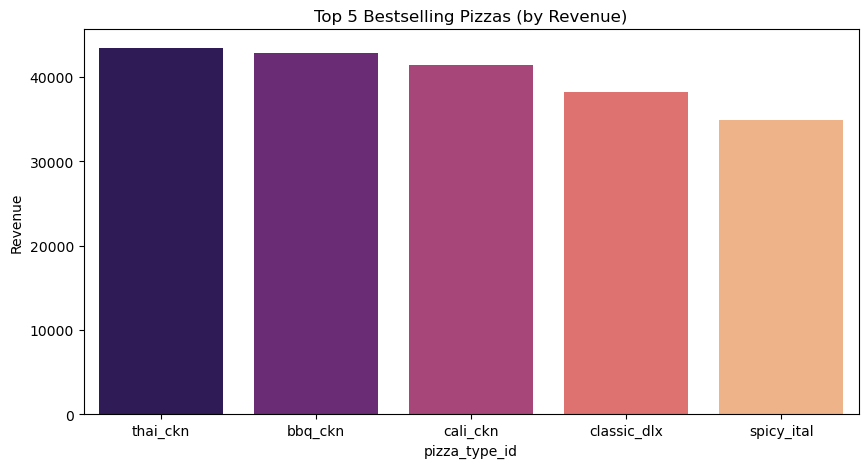

In [31]:

plt.figure(figsize=(10,5)) 
sns.barplot(x=top5_revenue.index, y=top5_revenue.values, palette='magma') 
plt.title('Top 5 Bestselling Pizzas (by Revenue)') 
plt.ylabel('Revenue') 

plt.savefig('top_5 sales_by Revenue', dpi=300, bbox_inches='tight')
plt.show()


## Monthly Sales Trend

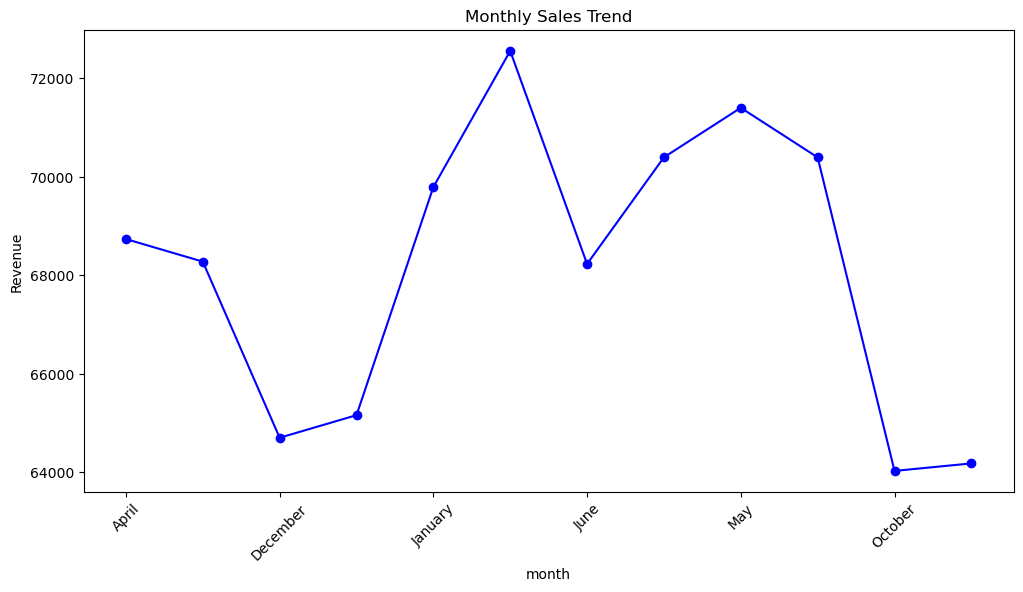

In [32]:
final_df['month'] = final_df['date'].dt.month_name() 
monthly_sales = final_df.groupby('month')['Revenue'].sum() 

plt.figure(figsize=(12,6)) 
monthly_sales.plot(kind='line', marker='o', color='blue') 
plt.title('Monthly Sales Trend') 
plt.ylabel('Revenue') 
plt.xticks(rotation=45) 

plt.savefig('monthl sales', dpi=300, bbox_inches='tight')
plt.show()

### Sales Distribution & Skewness

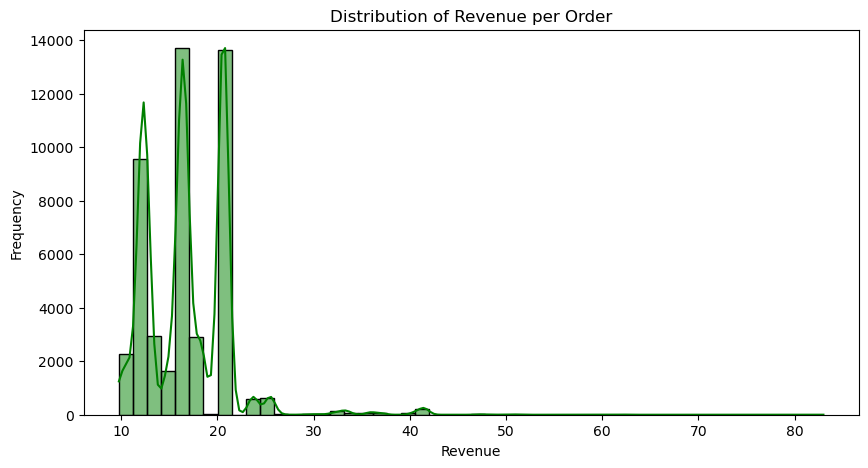

In [34]:
plt.figure(figsize=(10,5)) 
sns.histplot(final_df['Revenue'], bins=50, kde=True, color='green') 
plt.title('Distribution of Revenue per Order') 
plt.xlabel('Revenue') 
plt.ylabel('Frequency') 

plt.savefig('sales distribution', dpi=1000, bbox_inches='tight')
plt.show()

### Percentiles


In [35]:
rev_percentiles = final_df['Revenue'].quantile([0.25, 0.5, 0.75, 0.9, 0.95]) 
rev_percentiles

0.25    12.75
0.50    16.50
0.75    20.50
0.90    20.75
0.95    20.75
Name: Revenue, dtype: float64

### Skewness

In [36]:
revenue_skewness = skew(final_df['Revenue']) 
revenue_skewness

1.7328029390351902

In [37]:
revenue_kurtosis = kurtosis(final_df['Revenue'], fisher=False)
revenue_kurtosis

11.894050006482827

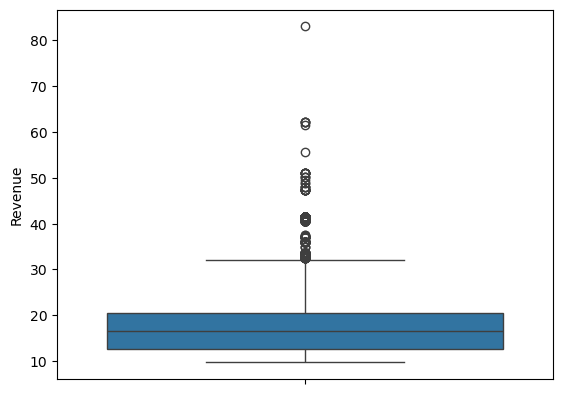

In [38]:
sns.boxplot(y=final_df['Revenue'])


plt.savefig('boxplot_by_revenue', dpi=300, bbox_inches='tight')
plt.show()

### ------ Pie Chart: Sales by Category -------

C:\Users\HP\AppData\Local\Temp\ipykernel_13860\441647767.py:5: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3', colors = colors)


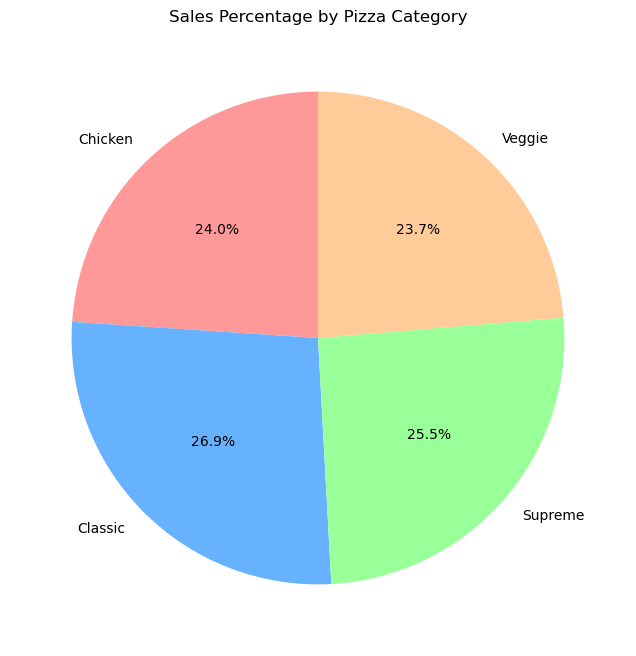

In [39]:

colors = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99", "#C2C2F0"]

category_sales = final_df.groupby('category')['Revenue'].sum() 
plt.figure(figsize=(8,8)) 
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3', colors = colors) 
plt.title('Sales Percentage by Pizza Category') 
plt.ylabel('') 

plt.savefig('sales percentage by pizza category', dpi=500, bbox_inches='tight')
plt.show()

### Low Performing Pizzas at a glance


In [40]:
low_sellers = final_df.groupby('pizza_type_id')['quantity'].sum().sort_values().head(5)
low_sellers

pizza_type_id
brie_carre      490
mediterraneo    934
calabrese       937
spinach_supr    950
soppressata     961
Name: quantity, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_13860\3608404471.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_sellers.index, y=low_sellers.values, palette="Set2")


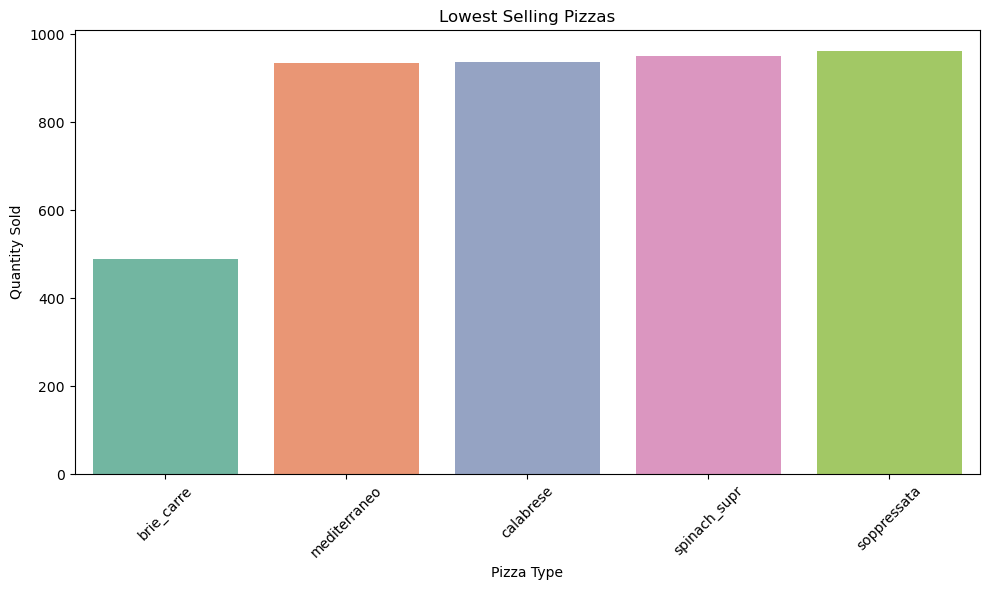

In [43]:
plt.figure(figsize=(10,6)) 
sns.barplot(x=low_sellers.index, y=low_sellers.values, palette="Set2") 
plt.title("Lowest Selling Pizzas") 
plt.xlabel("Pizza Type") 
plt.ylabel("Quantity Sold") 
plt.xticks(rotation=45) 
plt.tight_layout() 

plt.savefig("lowest_selling_pizzas.png", dpi=300, bbox_inches="tight") 
plt.show()

In [53]:
final_df.drop('order_details_id', axis=1, inplace=True)
final_df

,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,Revenue,hour,day_of_week,month
0,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,11,Thursday,January
1,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00,11,Thursday,January
2,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50,11,Thursday,January
3,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,11,Thursday,January
4,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00,11,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",16.75,21,Thursday,December
48616,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",17.95,21,Thursday,December
48617,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",12.00,21,Thursday,December
48618,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",20.25,22,Thursday,December


# Insights Based on The Datasets Information 

Comprehensive Analysis of Pizza Outlet Sales Data

Introduction
Pizza! The ultimate comfort food that's loved by people all around the world. Originating from Italy, pizza is a savory dish made from a circular flatbread topped with a variety of ingredients such as cheese, tomato sauce, meats, vegetables, and herbs. With its crispy crust, gooey cheese, and flavorful toppings, pizza is a culinary delight that's hard to resist.
Pizza is one of the most popular foods globally, with a rich history and diverse variations. From classic combinations like margherita and pepperoni to more adventurous options like Hawaiian and BBQ chicken, pizza offers endless possibilities for customization. In this analysis, we explore the most popular pizza types, favorite toppings, and flavor combinations that make pizza a beloved dish around the world.
This study analyzes transactional data from a pizza outlet, combining order details, menu information, and pricing to uncover sales patterns, customer preferences, and operational insights. The findings provide evidence-based recommendations for producers and policy makers to optimize menu offerings, pricing strategies, and operational efficiency.

Key Findings

1. Menu Diversity
The outlet offers over 30 distinct pizza types, spanning categories such as Classic, Supreme, Veggie, and Specialty. However, sales are highly concentrated: a handful of pizzas account for the majority of revenue, while several menu items show minimal traction.

Interpretation: The menu is broad, but customer demand follows the Pareto principle — ~20% of pizzas generate ~80% of sales.

 Figure 1: Bar chart of Top 5 Bestselling Pizzas (by Quantity and Revenue)
 

<img src="top_5 sales_by quantity.png" alt = "top_5 Sales" width = "60%" height= "40%">






2. Pricing and Revenue
Average pizza price: mid-range, reflecting affordability for mass-market customers.


<img src="top_5 sales_by revenue.png" alt = "top_5 Sales" width = "60%" height= "40%">







Revenue distribution: right-skewed, with most orders modest but a few large orders driving overall revenue.  
- Percentiles:  
  - 25th percentile: low-value orders  
  - Median: typical family-size purchase  
  - 90th percentile: large group orders significantly boosting revenue.  

Interpretation: While most customers buy standard pizzas, occasional bulk purchases (e.g., parties, events) are critical revenue drivers.

  Figure 2: Histogram of Revenue Distribution with KDE curve 



 <img src="sales distribution.png" alt = " Sales distribution" width = "60%" height= "40%">






3. Sales Trends
Monthly sales: Seasonal peaks observed, particularly during festive months (December) and summer gatherings.  
Daily sales: Highest on weekends, especially Fridays and Saturdays.  
- Hourly sales: Peak demand during evening hours (6–9 PM), aligning with dinner time.  

Sales are strongly tied to social occasions and leisure time, suggesting opportunities for targeted promotions.



 Figure 3: Line chart of Monthly Sales Trend




<img src="monthl sales.png" alt = "monthly Sales" width = "60%" height= "40%">






4. Category and Size Preferences
- Category dominance: Classic pizzas consistently outperform other categories.  
- Size preference: large pizzas are most popular, reflecting group consumption patterns.  
Interpretation: Customers prioritize familiar flavors and value-for-money sizes.


 Figure 4: Heatmap of Sales 
<img src="boxplot_by_revenue.png" alt = "scatter Sales" width = "60%" height= "40%">








 5. Underperforming Pizzas
Several niche or specialty pizzas show low sales volume and revenue. These items contribute little to overall performance and may dilute operational efficiency.
Menu optimization is needed to reduce waste and focus on high-demand items.

 Figure 5: Bar chart of Lowest Selling Pizzas



<img src="lowest_selling_pizzas.png" alt = "top_5 Sales" width = "60%" height= "40%">



Predictions
Seasonality will persist: Expect spikes during holidays and weekends.  
- Customer preference stability: Classic pizzas will remain dominant unless new flavors are aggressively marketed.  
-Growth opportunity: Bundling and promotions during off-peak months can smooth demand.  
-Digital ordering impact: As online platforms expand; evening and weekend peaks may intensify.


Figure 5: Pie chart of Sales Percentage by Pizza Category


<img src="sales percentage by pizza category.png" alt = "percentage Sales" width = "60%" height= "40%">



Recommendations
For Producers (Outlet Managers)
1. Menu Optimization  
   - Retain and promote top 5 bestselling pizzas.  
   - Rebrand or remove consistently underperforming items.  
   - Introduce seasonal specials to capture holiday demand.
2. Pricing Strategy
   - Maintain mid-range pricing but explore bundle deals (family packs, party combos).  
   - Offer loyalty discounts during off-peak months.

3. Operational Efficiency 
   - Increase staffing and inventory during peak hours (evenings, weekends).  
   - Streamline supply chain for high-demand categories to reduce stockouts.

For Policy Makers (Franchise Owners / Industry Regulators)
1. Data-Driven Decision Making
   - Encourage outlets to adopt sales analytics dashboards for real-time monitoring.  
   - Standardize reporting across franchises to identify regional trends.

2. Consumer Health & Diversity
   - Promote balanced menu offerings (e.g., more veggie options).  
   - Incentivize innovation in underperforming categories to diversify consumer choices.

3. Economic Strategy
   - Recognize the role of pizza outlets in local economies (employment, supply chains).  
   - Support small outlets with training in data analytics and digital marketing.

Conclusion
This analysis reveals that pizza sales are concentrated, seasonal, and socially driven. By focusing on bestselling items, optimizing pricing, and aligning operations with demand cycles, producers can maximize profitability. Policy makers, meanwhile, can foster industry resilience by promoting data-driven practices and menu diversification.  
Ultimately, the findings underscore the importance of analytics in food service management - turning raw sales data into actionable insights that benefit both businesses and consumers.
